In [12]:
# Import packages
from datetime import datetime
start_time = datetime.now() # initialize timer
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from MulensModel import Model
import MulensModel as mm
import os 
Cpath=os.getcwd()+"/"

In [13]:
#FileDownloader(gaianame,Cpath+"gaiaLC/","nose")

In [14]:
t_inicial=2459504.49
t_final=t_inicial+365.25
difT=365.25
posibles_fechas=[t_inicial+difT/3,t_inicial+difT/2,t_final-difT/3]

Nombre objeto Gaia20cty.csv numero de obs=100
tiempo en años  7.676496821917492


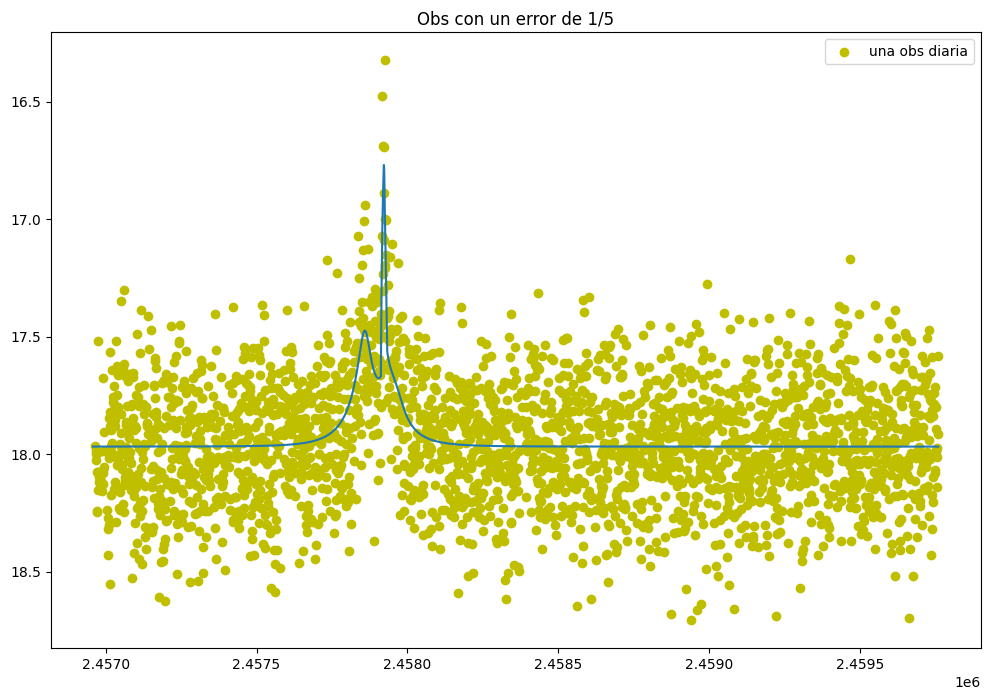

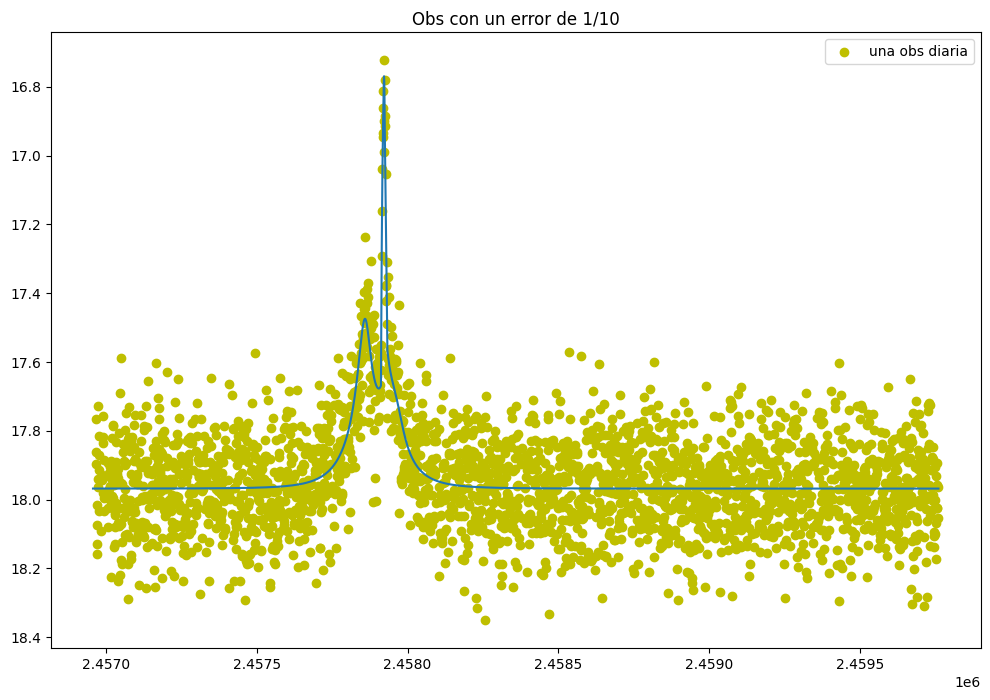

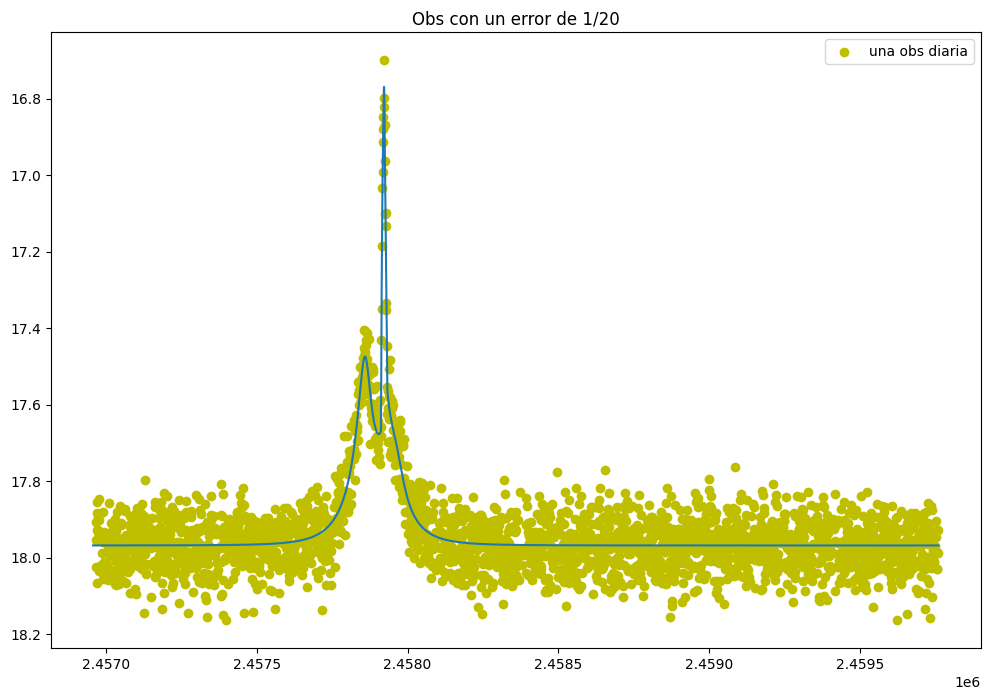

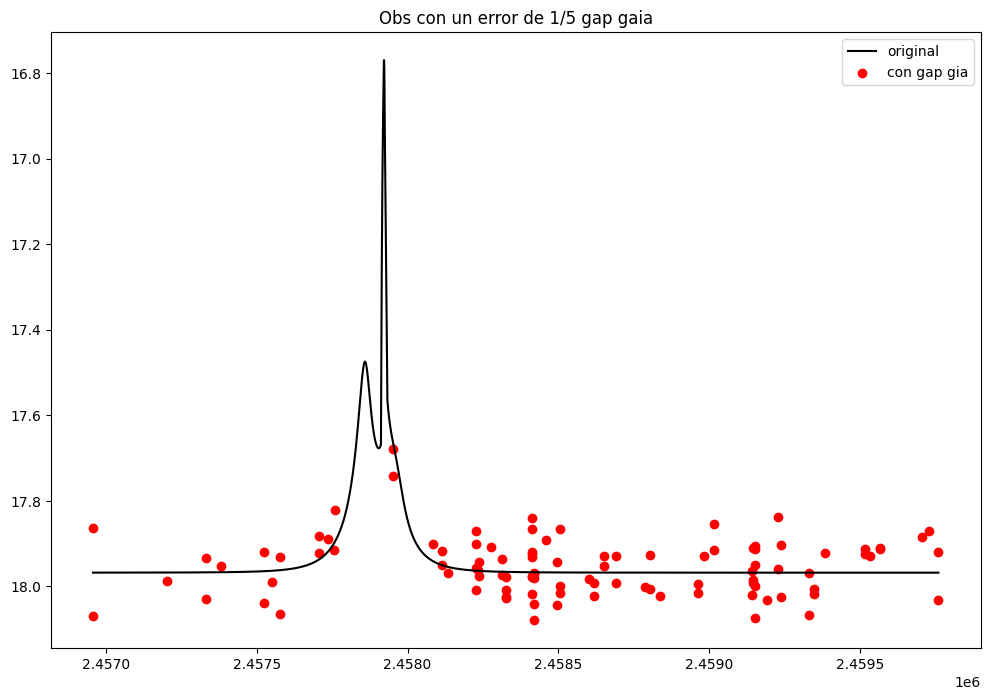

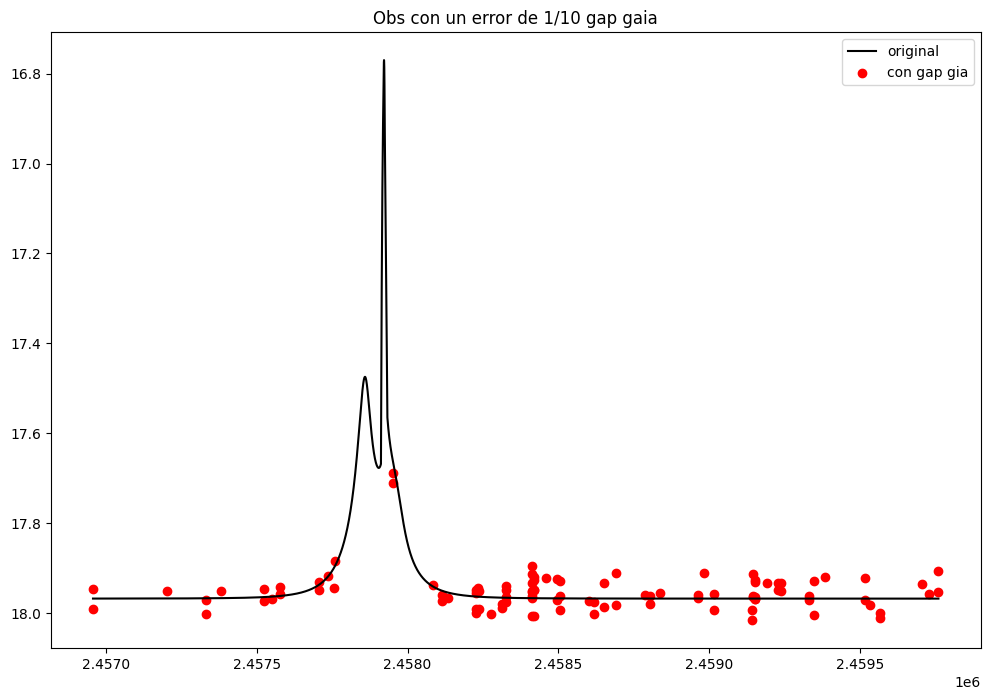

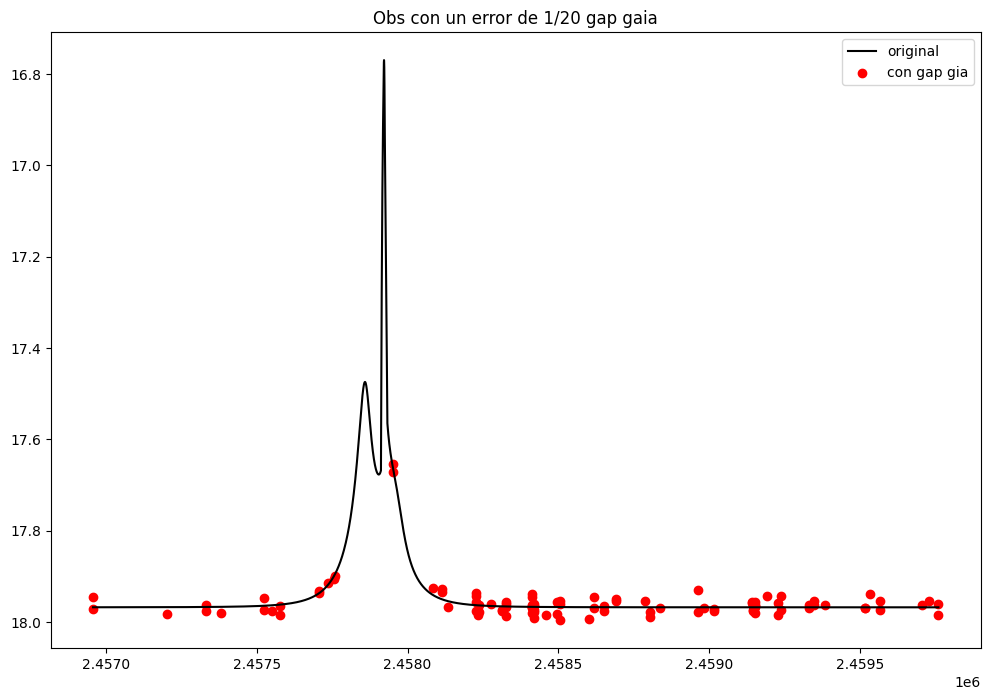

tiempo en años  7.676496821917492


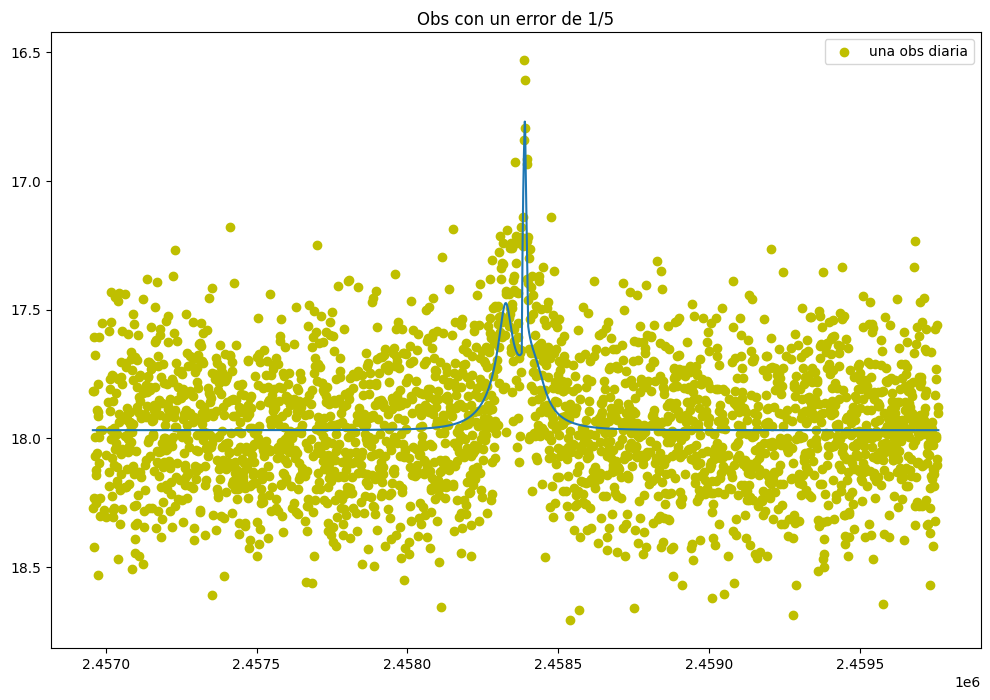

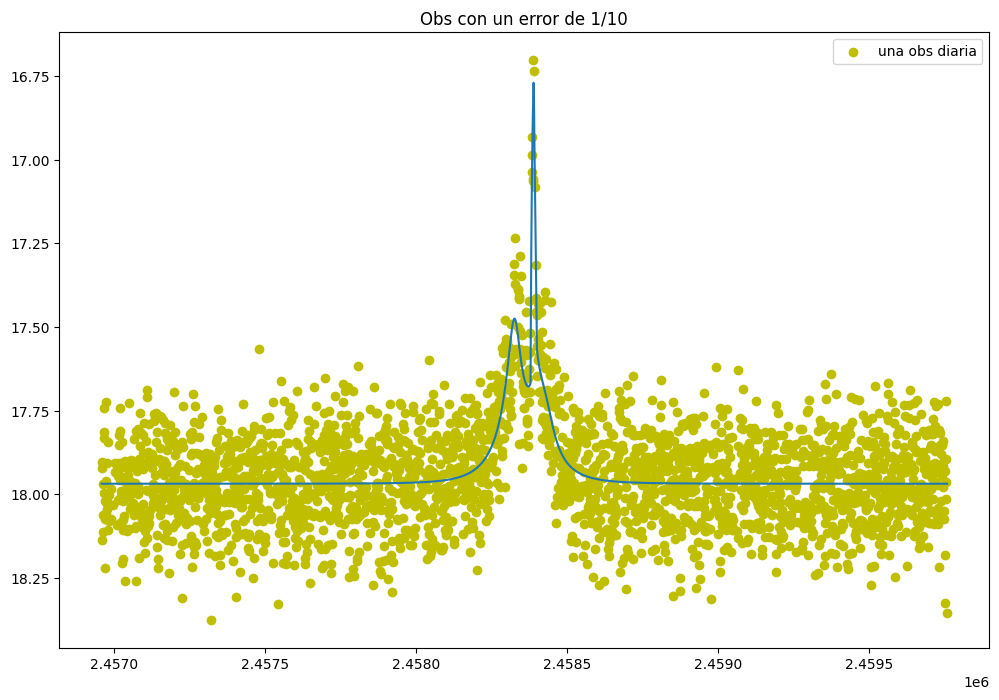

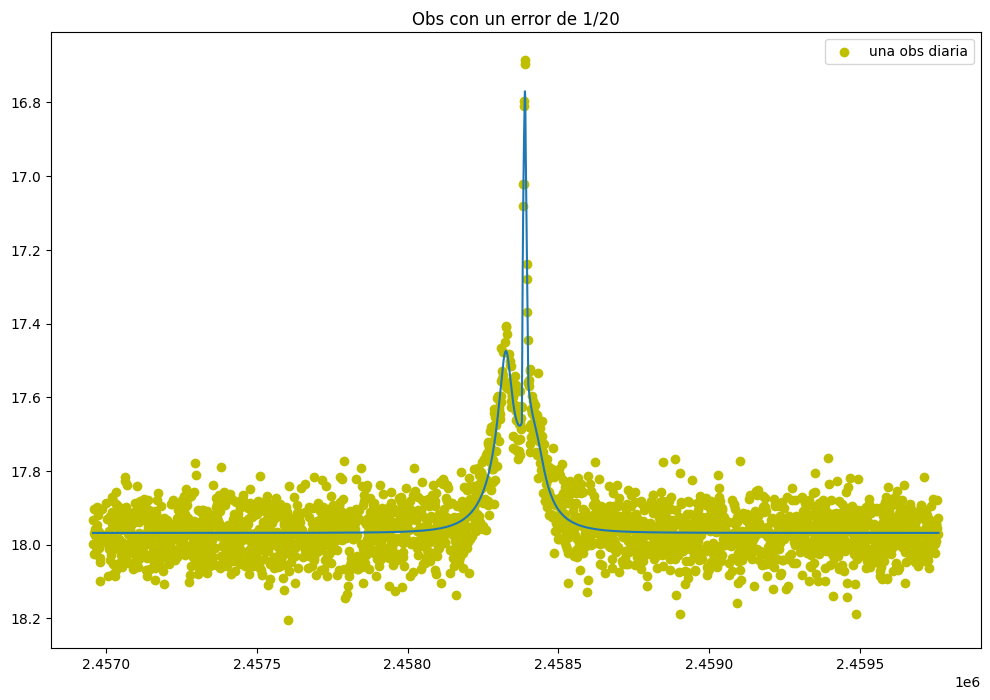

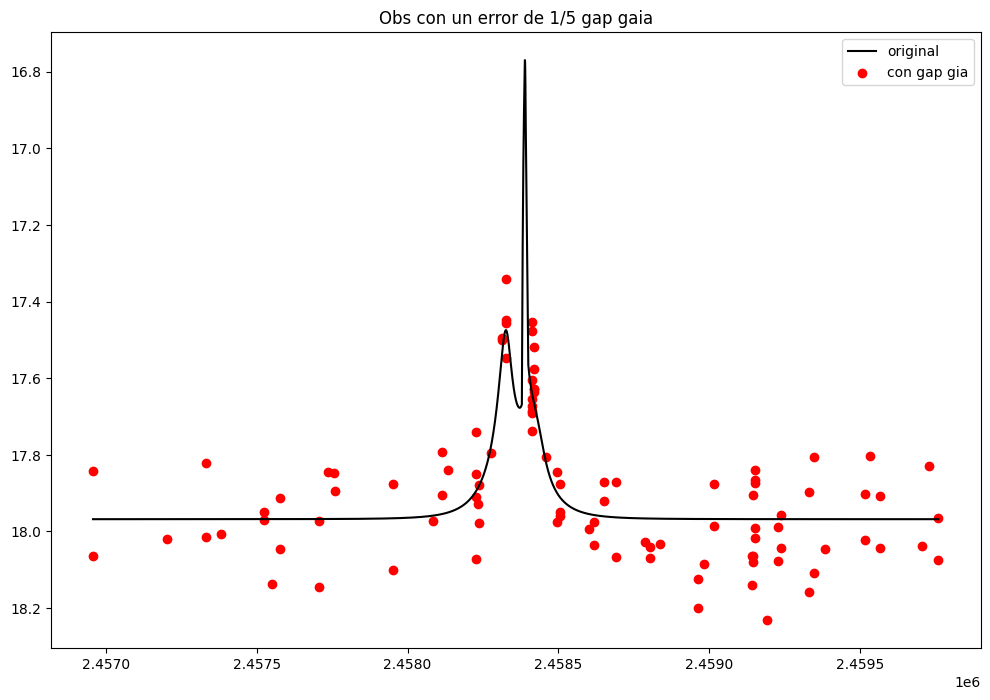

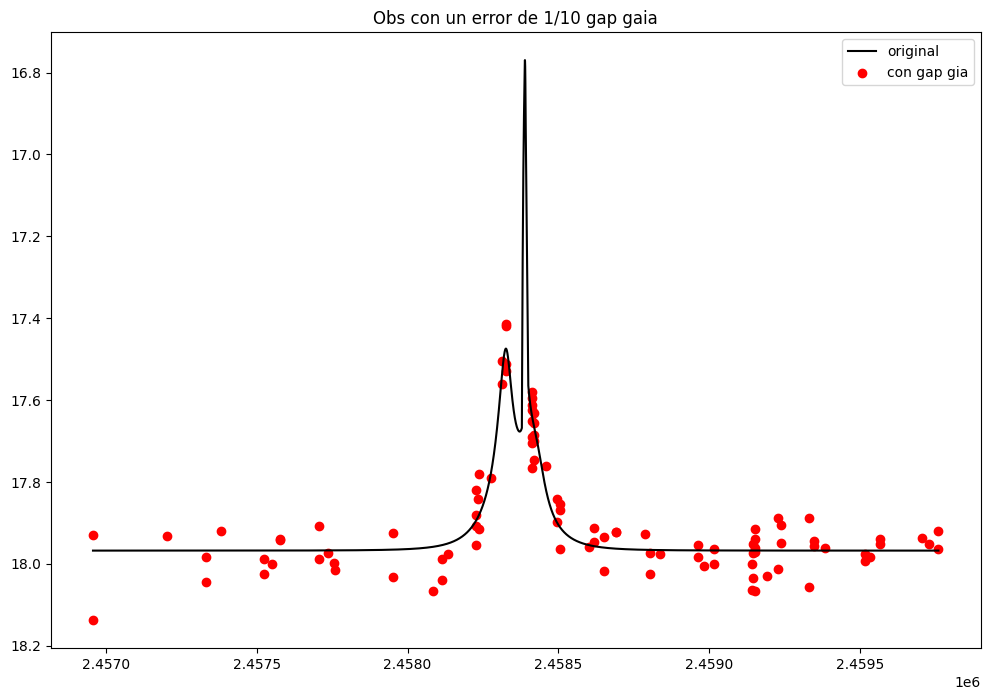

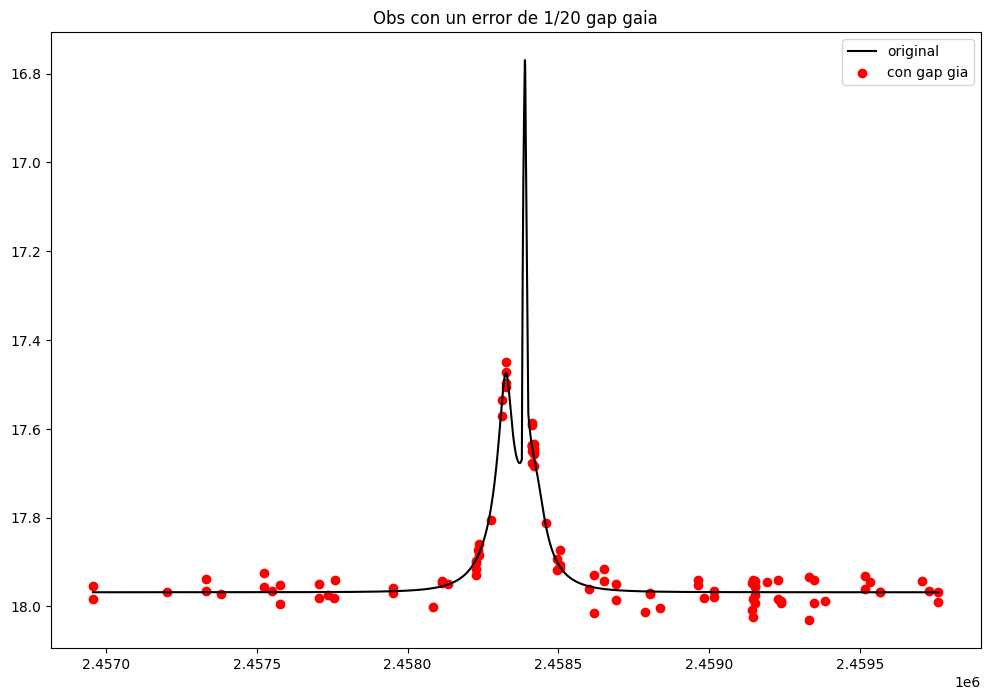

tiempo en años  7.676496821917492


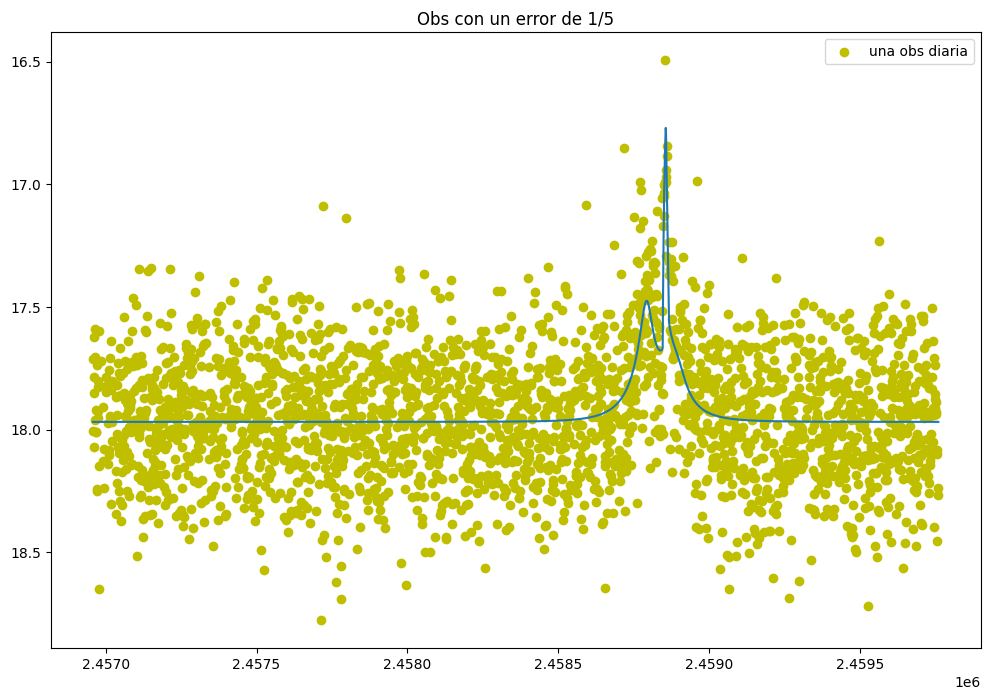

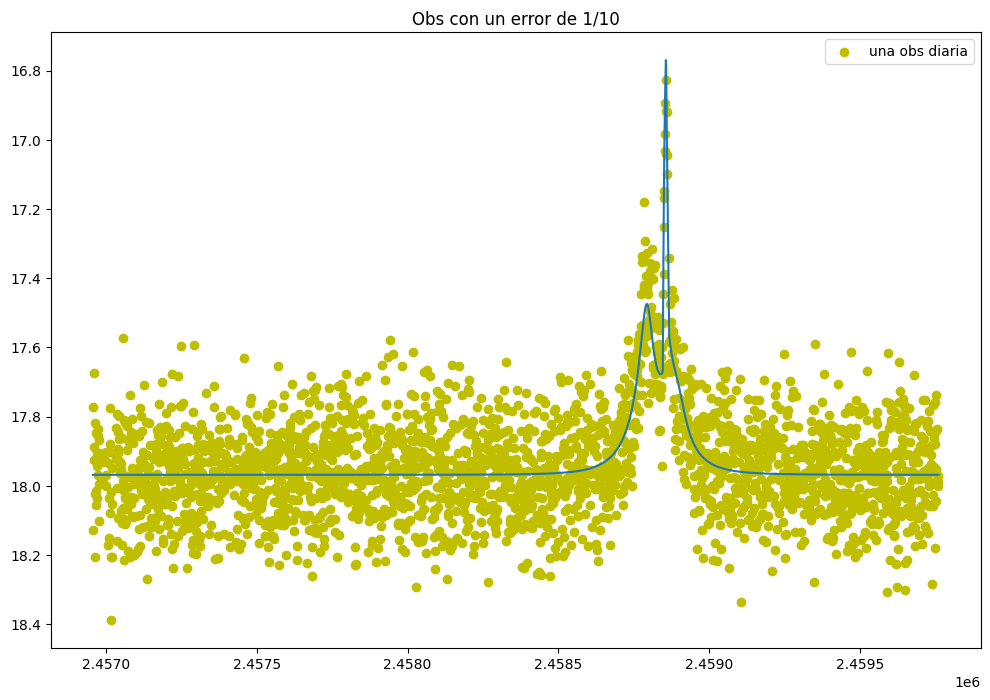

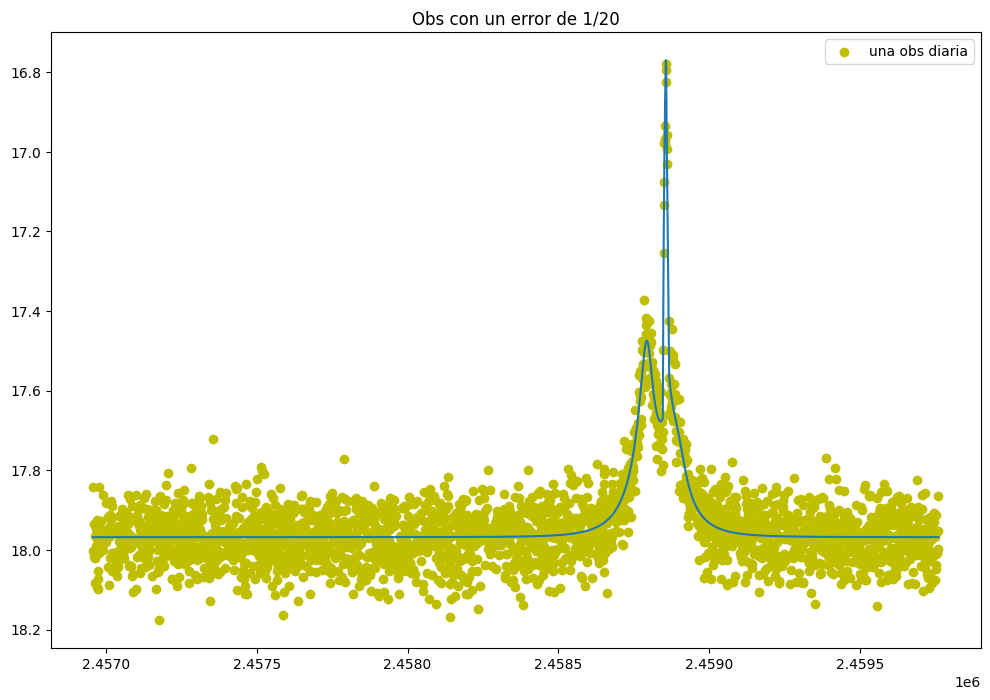

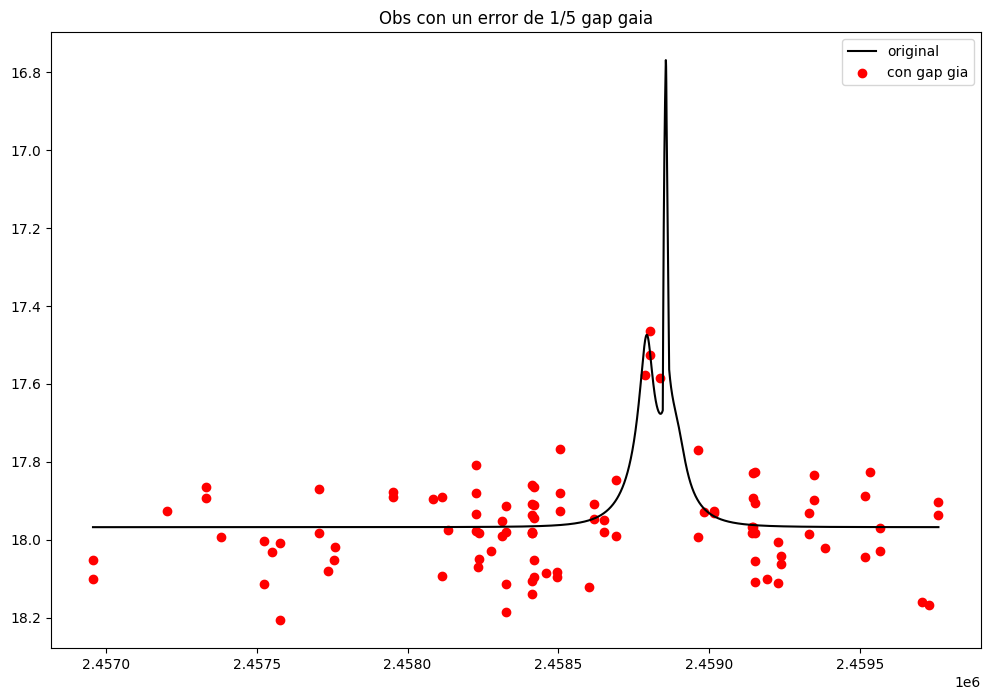

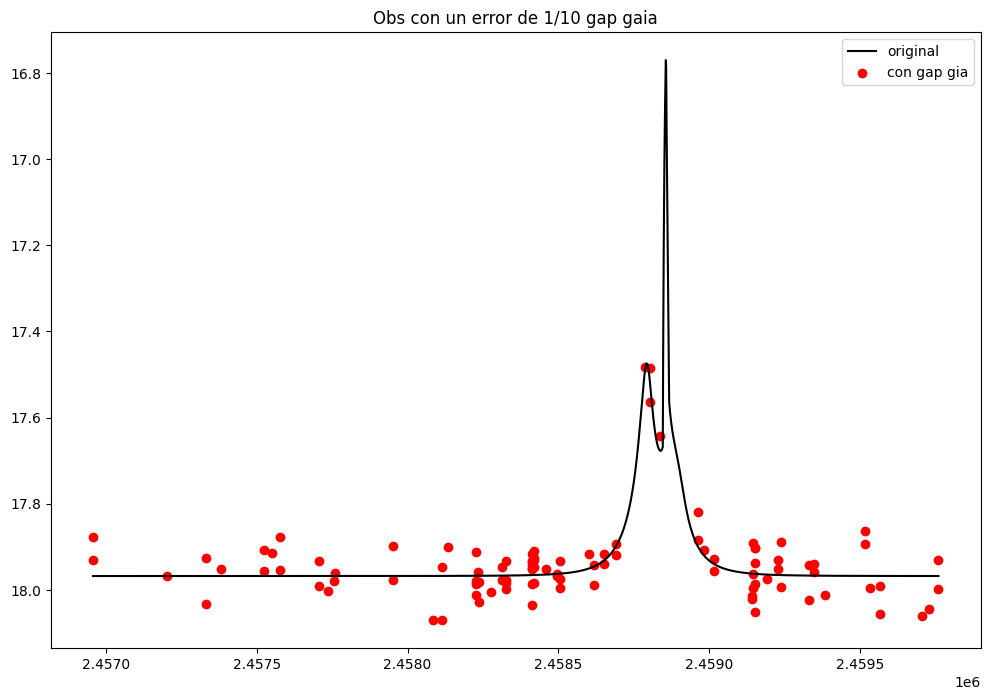

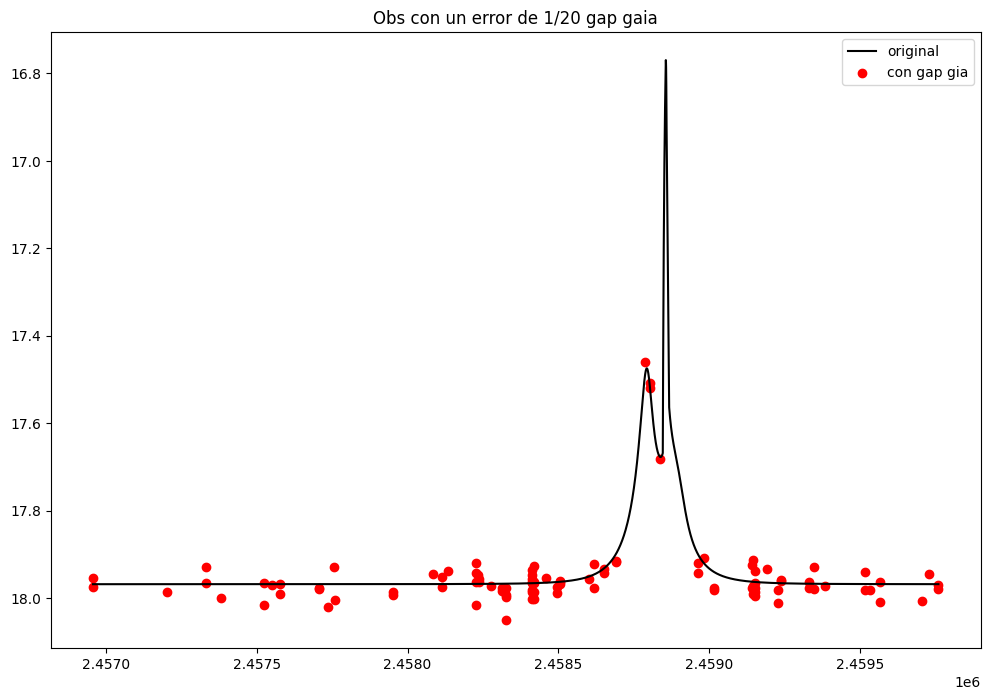

In [ ]:
t_0a=[]
u_0a=[]
t_Ea=[]
sa=[]
qa=[]
alphaa=[]
rhoa=[]
mass_distributiona=[]
counter=0
nombre=[]
totaldemodelos=3
numero_de_modelo=np.linspace(0,totaldemodelos-1,totaldemodelos)
#np.random.shuffle(xd)
for cual in numero_de_modelo:
    #desfase
    d=0*500
    i=0*500
    n=d+i
    #dt=0.1
    u_0 = np.linspace(0.5,1,totaldemodelos)[int(cual)]
    t_E = 100 
    obj=np.random.choice(os.listdir(Cpath+"gaiaLC"),size=1,replace=False)[0]
    pandaread=pd.read_csv(Cpath+"gaiaLC"+"/"+obj)
    newtime=pandaread["JD(TCB)"].values
    print("Nombre objeto "+obj+" numero de obs="+str(len(newtime)))
    for w in range(len(posibles_fechas)):
        t_inicial=min(newtime)
        t_final=max(newtime)
        difT=max(newtime)-min(newtime)
        print("tiempo en años ",difT/365)
        posibles_fechas=[min(newtime)+difT/3,min(newtime)+difT/2,max(newtime)-difT/3]
        pspl = mm.Model({'t_0': posibles_fechas[w], 'u_0': u_0, 't_E': t_E})

        # Create a planet model with same PSPL parameters
        s = 1.0 #separacion entre fuentes
        q = 1 #relacion de masa entre fuentes
        alpha = 45.#alpha es el angulo entre la trayectoria y la linea que une las 2 masas
        rho = 0.05 #rho es la densidad 
        mass_distribution="VBBL"

        double = mm.Model(
            {'t_0': posibles_fechas[w], 'u_0': u_0, 't_E': t_E, 's': s, 'q': q, 'alpha': alpha,
             'rho': rho})
        plt.subplots(figsize=(12,8))
        double.set_magnification_methods([t_inicial,mass_distribution, t_final ])
        double.plot_lc(source_flux=20, blend_flux=21,dt=0.25*(2/3),t_start=t_inicial,
        t_stop=t_final,color="k",zorder=10, linewidth=3,label="modelo original")
        
        ax = plt.gca()
        line = ax.lines[0]
        x=line.get_xydata()[:,0]
        y=line.get_xydata()[:,1]
        plt.plot(x,y)
        plt.close()
        N=[[int(i)-15,int(i)+15] for i in np.random.uniform(15,len(x),int(5*difT/365.25))]#toma 5 valores entre 15 y el largo de la array y crea ventanas
        def granlista(i):
            XD=[]
            for ii in i:
                XD.append(list(np.arange(int(ii)-15,int(ii)+16)))
            return XD
        listadeventanas=[]
        for year in range(365,len(x),365*6):
            if year==365:
                xdd=[int(i) for i in np.random.uniform(15,year-15,5)]
            else:
                xdd=[int(i) for i in np.random.uniform(year+15-365*6,year-15,5)]
            listadeventanas.append(xdd)
        N2=np.array([granlista(i) for i in listadeventanas]).ravel()
        variables=np.random.binomial(6, 1/2, int(difT)) 
        diasobservados=[variables[i]+6*i for i in range(len(variables))]#selecciona una de las observaciones 
        #dejar solo 5, 10,20 t0 masmenos tE
        #histograma de los tE de gaia
        for ii in [5,10,20]:
            plt.subplots(figsize=(12,8))
            plt.plot(x,y)
            y_error=line.get_xydata()[:,1]+np.random.normal(0,(max(y)-min(y))/ii, size=(len(x),))
            
            x_new,y_new=x.copy(),y_error.copy()
            x_new[N2]=np.nan
            y_new[N2]=np.nan
            #plt.scatter(x,y)
            plt.scatter(x_new[diasobservados],y_new[diasobservados],label="una obs diaria",alpha=1,color="y")
            plt.title("Obs con un error de 1/"+str(ii))
            plt.legend()
            plt.gca().invert_yaxis()
            plt.show()    
        pspl = mm.Model({'t_0': posibles_fechas[w], 'u_0': u_0, 't_E': t_E})
        s = 1.0 #separacion entre fuentes
        q = 1 #relacion de masa entre fuentes
        alpha = 45.#alpha es el angulo entre la trayectoria y la linea que une las 2 masas
        rho = 0.05 #rho es la densidad 
        mass_distribution="VBBL"
        double = mm.Model(
            {'t_0': posibles_fechas[w], 'u_0': u_0, 't_E': t_E, 's': s, 'q': q, 'alpha': alpha,
             'rho': rho})
        for ii in [5,10,20]:
            double.set_magnification_methods([min(newtime),mass_distribution,max(newtime)])
            double.plot_lc(source_flux=20, blend_flux=21,times=newtime,color="k", linewidth=3,label="modelo original")#0.25==4 obs x dia entonces si muevo eso puedo cambiar el n° de obs x dia
            ax = plt.gca()
            line = ax.lines[0]
            x2=line.get_xydata()[:,0]
            y2=line.get_xydata()[:,1]
            plt.close()

            plt.subplots(figsize=(12,8))
            y2=y2+np.random.normal(0,(max(y2)-min(y2))/ii, size=(len(x2),))
            x_new,y_new=x2.copy(),y2.copy()
            plt.plot(x,y,label="original",alpha=1,color="k")
            plt.scatter(x_new,y_new,label="con gap gia",alpha=1,color="r")
            plt.title("Obs con un error de 1/"+str(ii)+" gap gaia")
            plt.gca().invert_yaxis()
            plt.legend()
            plt.show()
    break   

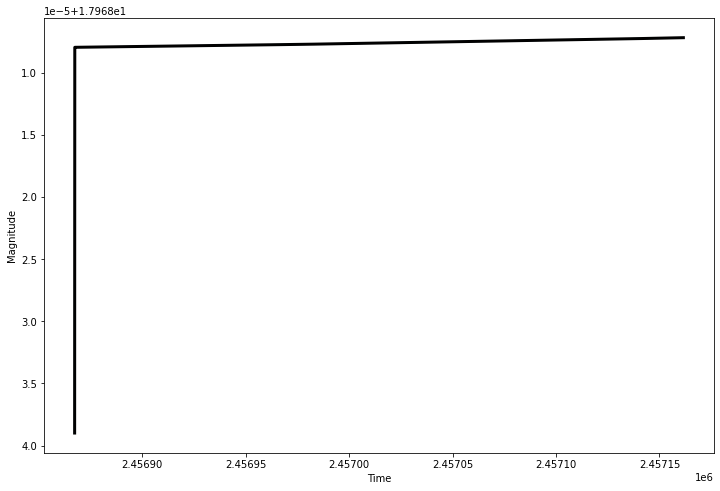

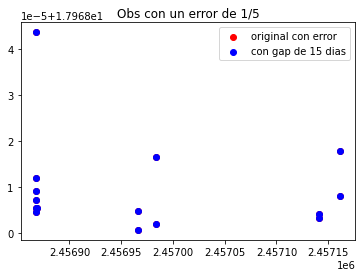

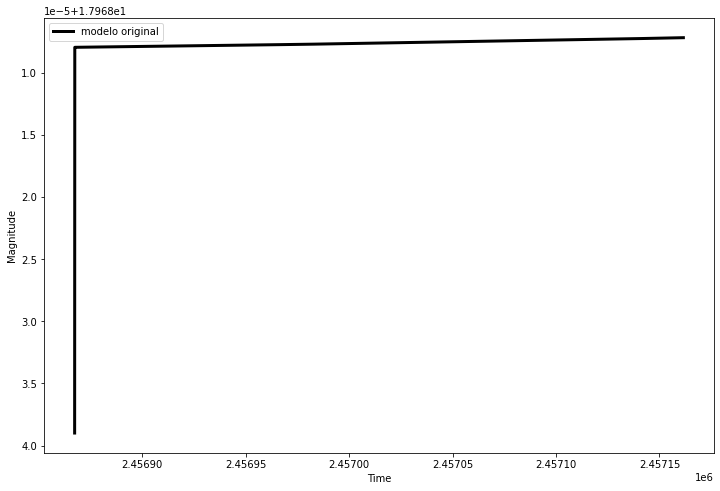

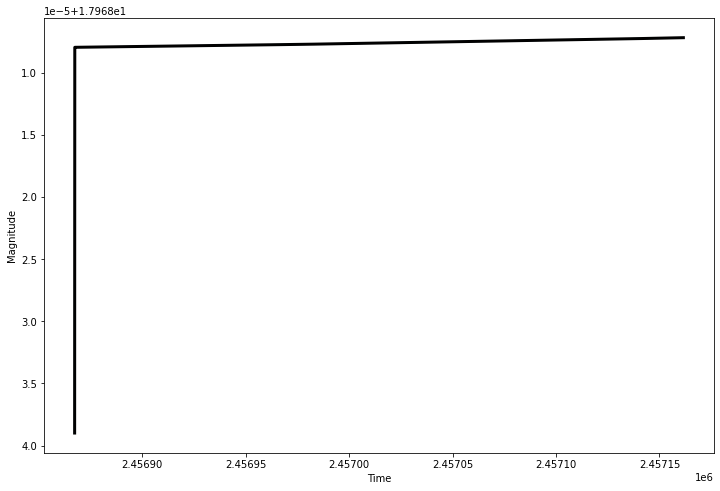

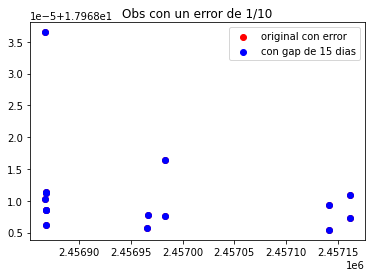

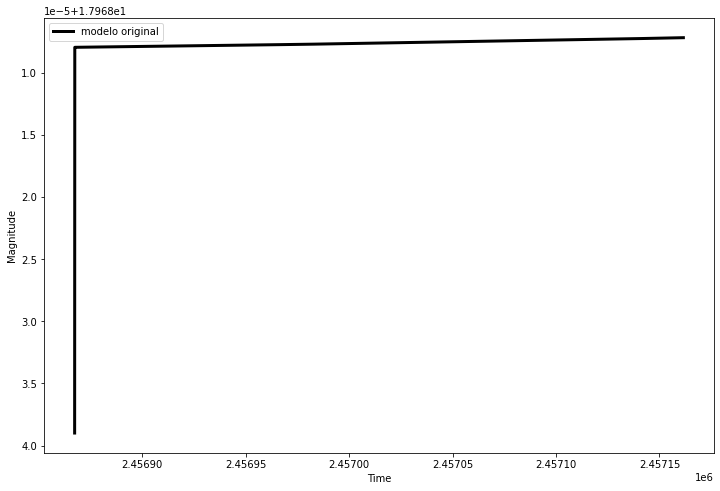

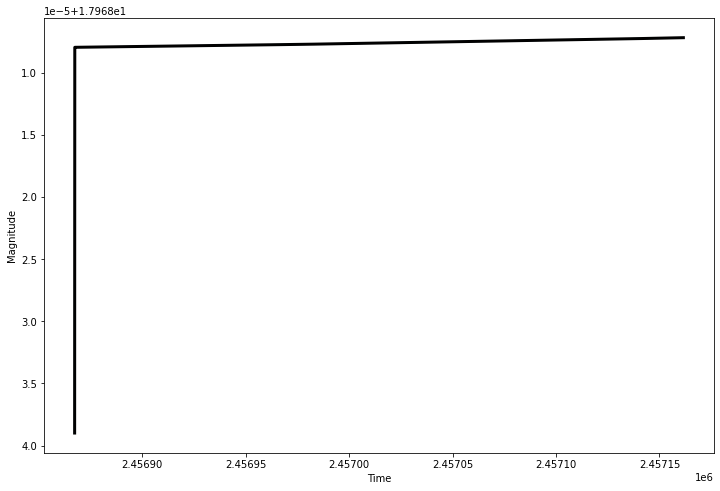

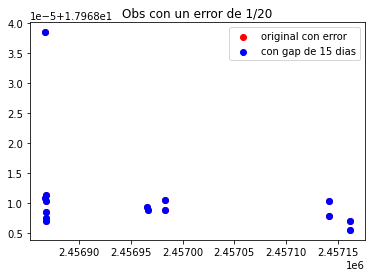

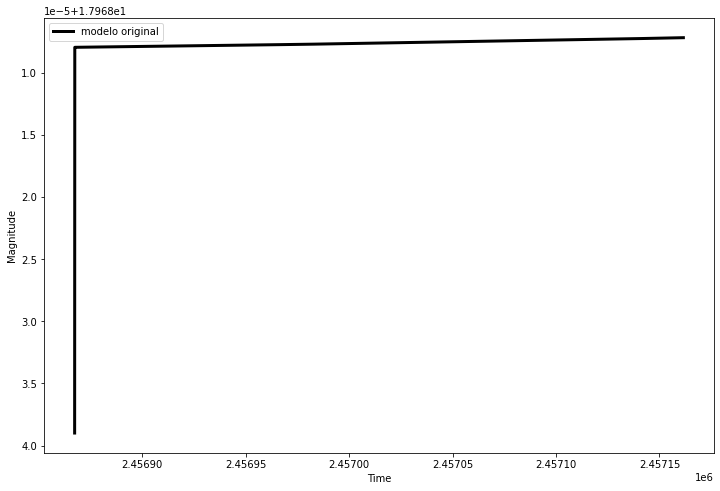

In [ ]:
obj=np.random.choice(os.listdir(Cpath+"gaiaLC"),size=1,replace=False)[0]
pandaread=pd.read_csv(Cpath+"gaiaLC"+"/"+obj)
newtime=pandaread["JD(TCB)"].values
for ii in [5,10,20]:
    plt.subplots(figsize=(12,8))
    double.set_magnification_methods([min(newtime),mass_distribution,max(newtime)])
    double.plot_lc(source_flux=20, blend_flux=21,times=newtime,color="k",zorder=10, linewidth=3,label="modelo original")#0.25==4 obs x dia entonces si muevo eso puedo cambiar el n° de obs x dia
    #===>errorpequeno=(max-min)/20,errormediano=(max-min)/10,errormaximo=(max-min)/5
    #==>
    ax = plt.gca()
    line = ax.lines[0]
    x=line.get_xydata()[:,0]
    y=line.get_xydata()[:,1]
    plt.plot(x,y)
    plt.show()
    #print(max(y)-min(y))
    y=line.get_xydata()[:,1]+np.random.normal(0,(max(y)-min(y))/ii, size=(len(x),))
    
    plt.scatter(x,y,label="original con error",color="r",alpha=1)
    x_new,y_new=x.copy(),y.copy()
    #x_new[N2]=np.NaN
    #y_new[N2]=np.NaN
    plt.scatter(x_new,y_new,label="con gap de 15 dias",alpha=1,color="b")
    #plt.scatter(x_new[diasobservados],y_new[diasobservados],label="una obs diaria",alpha=1,color="y")
    plt.title("Obs con un error de 1/"+str(ii))
    #plt.gca().invert_yaxis()
    plt.legend()
    plt.show()    
    #double.plot_lc(source_flux=20, blend_flux=21,times=x-500,color="k",zorder=10, linewidth=3,label="modelo original")
    plt.show()
    plt.subplots(figsize=(12,8))
    double.plot_lc(source_flux=20, blend_flux=21,times=newtime,color="k",zorder=10, linewidth=3,label="modelo original")
    #plt.scatter(x_new[diasobservados],y_new[diasobservados],label="una obs diaria",alpha=1,color="y")
    plt.legend()
    plt.show()